In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="joblib.externals.loky")

In [3]:
data = load_iris()
X = data.data 
y = data.target  

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [13]:
labels = kmeans.labels_

In [15]:
centroids = kmeans.cluster_centers_

In [17]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.48


In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

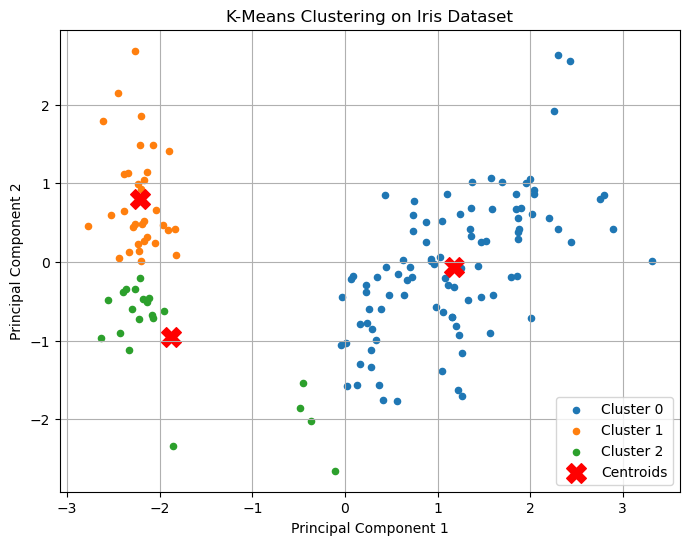

In [27]:
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], 
                s=20, label=f"Cluster {cluster}")  # Adjusted dot size to 20
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1],
            c="red", marker="X", s=200, label="Centroids")  # Centroids remain prominent
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()